In [1]:
!pip install tensorflow-data-validation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
import tensorflow_data_validation as tfdv
import warnings
from datetime import date, datetime
from scipy.stats import norm
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

%matplotlib inline

In [114]:
# reading data

df1 = pd.read_parquet('/content/yellow_tripdata_2020-03.parquet')
df2 = pd.read_parquet('/content/yellow_tripdata_2020-05.parquet')

In [115]:
#concatinating dataframes
frames= [df1, df2]
data = pd.concat(frames)

## **Exploratory Data Analysis and Cleaning**

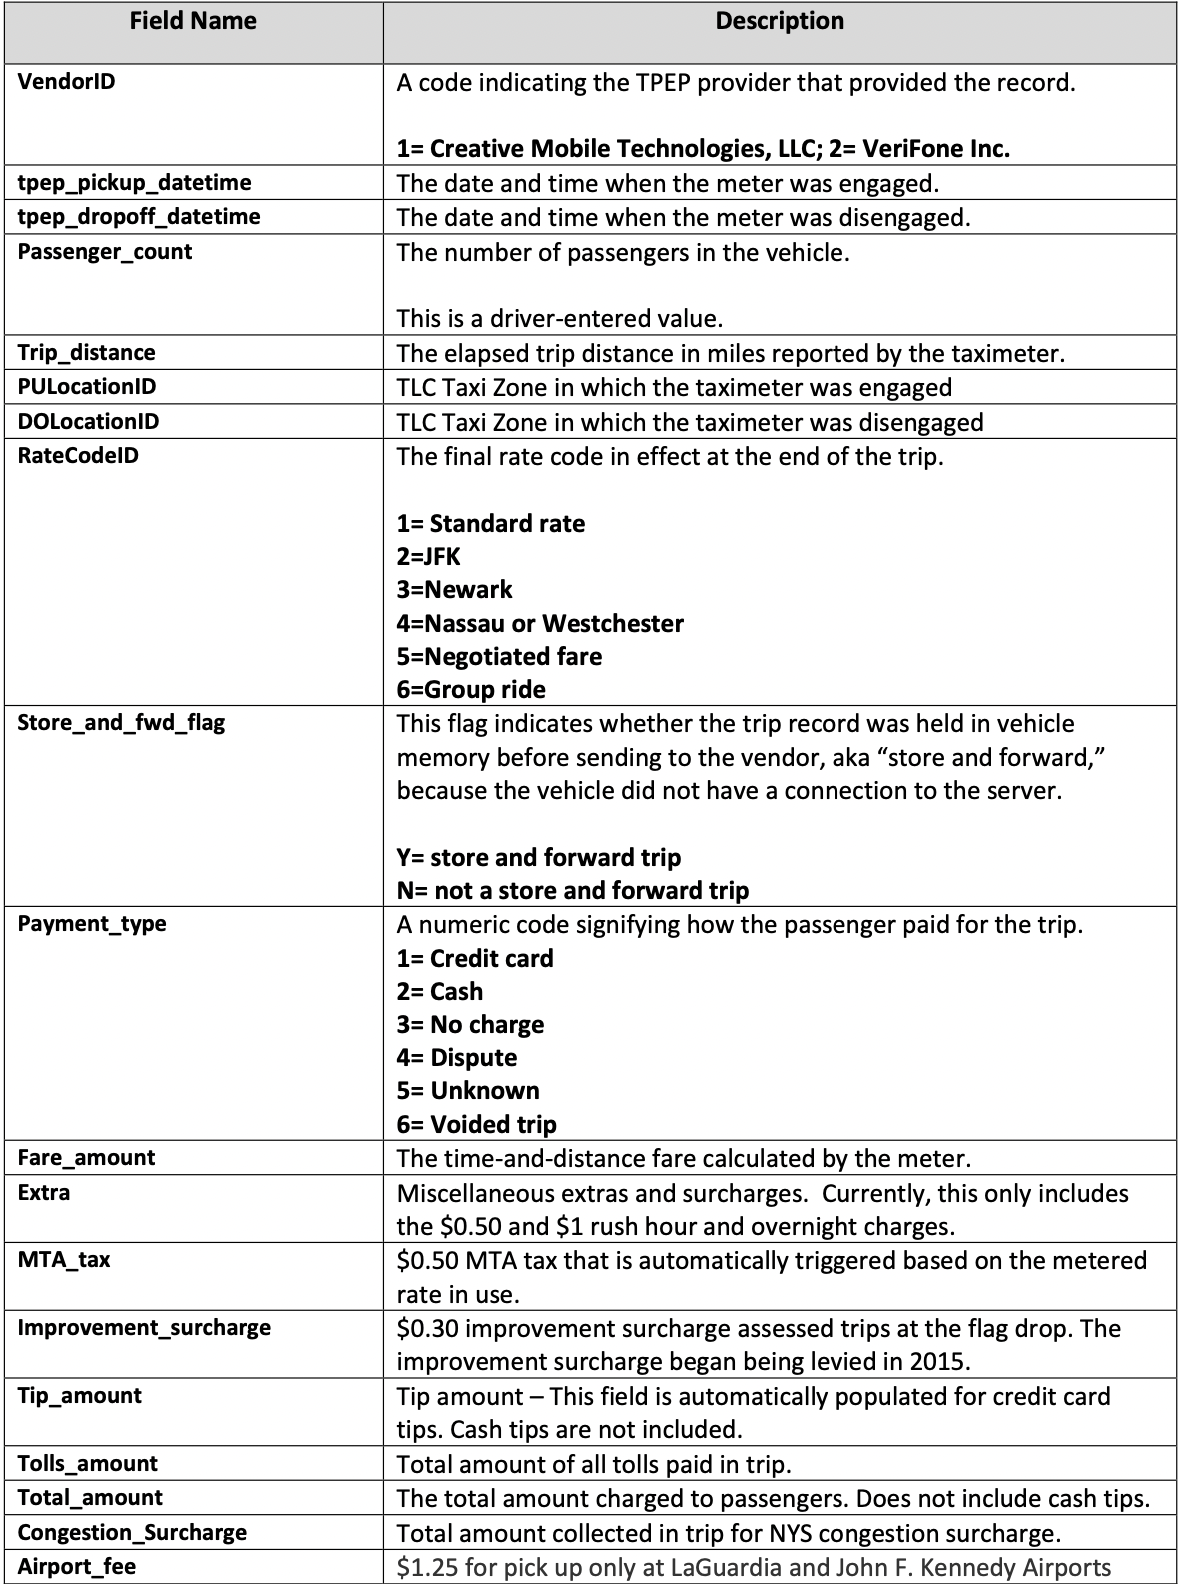

In [78]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.00,3.0,0.5,2.00,0.00,0.3,27.80,2.5,None
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.50,0.5,0.5,0.00,0.00,0.3,3.80,0.0,None
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.00,3.0,0.5,1.95,0.00,0.3,11.75,2.5,None
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.00,0.5,0.5,1.76,0.00,0.3,10.56,2.5,None
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.50,3.0,0.5,4.05,0.00,0.3,24.35,2.5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348410,2,2020-05-31 23:49:40,2020-06-01 00:24:13,NaN,17.08,NaN,None,202,89,0,41.99,0.0,0.5,0.00,6.12,0.3,51.41,NaN,None
348411,2,2020-05-31 23:05:22,2020-05-31 23:31:21,NaN,15.09,NaN,None,137,218,0,39.56,0.0,0.5,0.00,6.12,0.3,48.98,NaN,None
348412,2,2020-05-31 23:12:51,2020-05-31 23:27:52,NaN,2.36,NaN,None,82,56,0,6.73,0.0,0.5,0.00,0.00,0.3,7.53,NaN,None
348413,2,2020-05-31 23:32:00,2020-05-31 23:38:00,NaN,1.14,NaN,None,137,162,0,5.93,0.0,0.5,0.00,0.00,0.3,9.23,NaN,None


In [116]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'] .replace({'Y':1,'N':0})

In [7]:
# compute TRAIN stats with TFDV
train_stats = tfdv.generate_statistics_from_dataframe(data)
# visualize TRAIN STATS
tfdv.visualize_statistics(train_stats)

In [8]:
schema = tfdv.infer_schema(statistics=train_stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'VendorID',INT,required,,-
'passenger_count',FLOAT,optional,single,-
'trip_distance',FLOAT,required,,-
'RatecodeID',FLOAT,optional,single,-
'store_and_fwd_flag',FLOAT,optional,single,-
'PULocationID',INT,required,,-
'DOLocationID',INT,required,,-
'payment_type',INT,required,,-
'fare_amount',FLOAT,required,,-


In [9]:
#shape of the data
data.shape

(3356102, 19)

In [10]:
#Total Missing Values
data.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            96709
trip_distance                  0
RatecodeID                 96709
store_and_fwd_flag         96709
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       96709
airport_fee              3356102
dtype: int64

In [117]:
data = data.drop('airport_fee', axis=1)

In [12]:
#the descriptive statistics of the dataframe
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,3.356102e+06,3.259393e+06,3.356102e+06,3.259393e+06,3.259393e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.259393e+06
mean,1.667640e+00,1.453859e+00,3.658543e+00,1.050638e+00,9.452067e-03,1.623053e+02,1.596411e+02,1.244626e+00,1.293062e+01,1.216658e+00,6.406087e-01,2.064802e+00,3.178832e-01,2.975405e-01,1.892838e+01,2.247827e+00
std,4.742970e-01,1.109531e+00,3.173301e+02,7.375650e-01,9.676119e-02,6.712467e+01,7.127640e+01,5.246824e-01,4.350775e+02,2.729334e+02,2.729307e+02,2.706952e+00,1.642071e+00,3.747866e-02,6.980848e+02,7.770240e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.259000e+03,-7.000000e+00,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.115000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,0.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,3.120000e+00,1.000000e+00,0.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.800000e+00,0.000000e+00,3.000000e-01,2.015000e+01,2.500000e+00
max,6.000000e+00,9.000000e+00,2.970045e+05,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,5.000008e+05,5.000005e+05,8.000000e+02,6.010200e+02,3.000000e-01,1.000004e+06,2.500000e+00


In [13]:
data.duplicated().sum()

0

In [14]:
data.nunique()

VendorID                       4
tpep_pickup_datetime     1528578
tpep_dropoff_datetime    1529262
passenger_count               10
trip_distance               4251
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 262
DOLocationID                 261
payment_type                   5
fare_amount                 7817
extra                        309
mta_tax                        7
tip_amount                  3115
tolls_amount                 714
improvement_surcharge          3
total_amount               11865
congestion_surcharge           6
dtype: int64

In [15]:
# define a function to plot bar chart to display a feature's distribution with percent labels.
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = data[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        
    ax.margins(y=0.1)

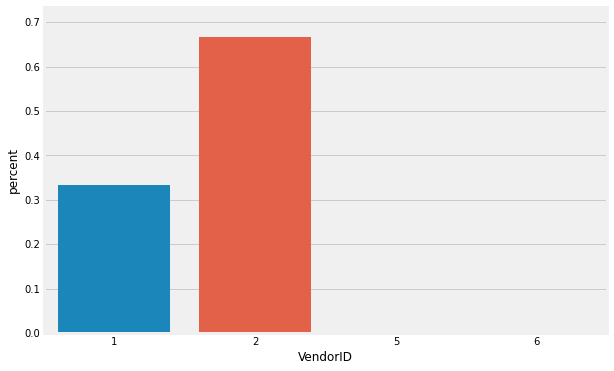

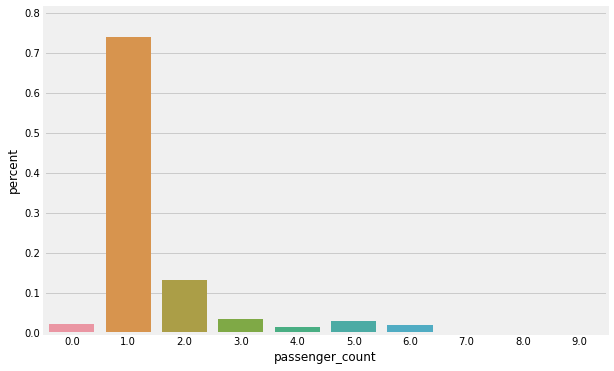

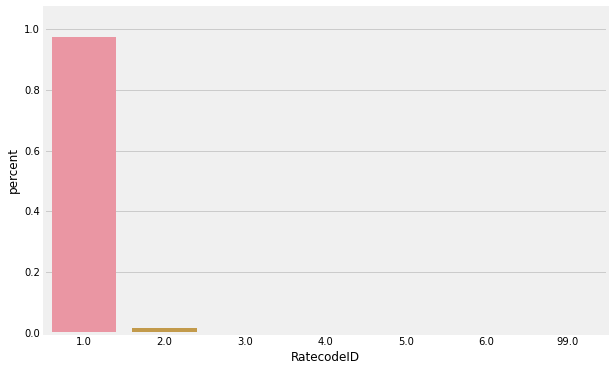

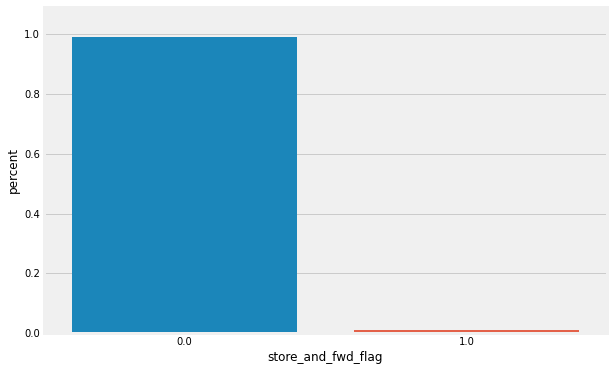

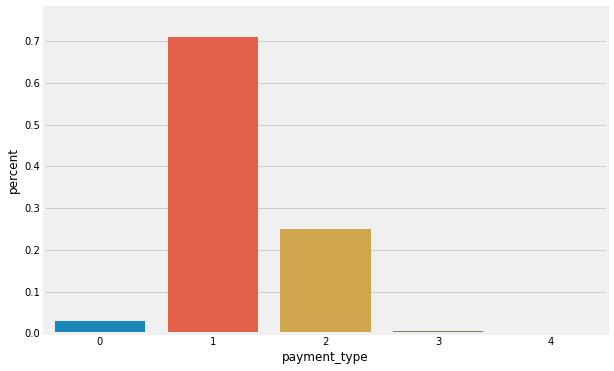

In [16]:
for attr in ['VendorID', 'passenger_count','RatecodeID',
             'store_and_fwd_flag','payment_type']:
    plot_bar_chart_with_percent_label(df=data, target_variable=attr)

In [17]:
print(data['tpep_dropoff_datetime'].nunique(), data['tpep_dropoff_datetime'].nunique())

1529262 1529262


In [118]:
data['ride_duration'] = round((data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.seconds/60, 2)


In [258]:
data1 = data[(data['VendorID'] < 3) & (data['RatecodeID'] != 99)&
             (data['passenger_count'] > 0) & (data['passenger_count']<9) & (data['mta_tax']>0)&
             (data['ride_duration']>0) & (data['tolls_amount']>0)&
             (data['total_amount']>0) & (data['fare_amount'] > 0) & (data['extra']> 0) &
             (data['tolls_amount']>0)	& (data['improvement_surcharge']>0)&	(data['total_amount']>0)	&
             (data['congestion_surcharge']>0)].copy()

In [189]:
data1.nunique()

VendorID                     2
tpep_pickup_datetime     52959
tpep_dropoff_datetime    53038
passenger_count              6
trip_distance             2585
RatecodeID                   3
store_and_fwd_flag           2
PULocationID               150
DOLocationID               253
payment_type                 4
fare_amount                307
extra                       10
mta_tax                      1
tip_amount                1226
tolls_amount               198
improvement_surcharge        1
total_amount              2655
congestion_surcharge         1
ride_duration             4914
dtype: int64

In [259]:
data1 = data1.drop(columns = ['improvement_surcharge','congestion_surcharge', 'mta_tax'], axis = 1)

In [260]:
data1.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,ride_duration
count,54923.000000,54923.000000,54923.000000,54923.000000,54923.000000,54923.000000,54923.000000,54923.000000,54923.000000,54923.000000,54923.000000,54923.000000,54923.000000,54923.000000
mean,1.456949,1.470222,12.006907,1.309087,0.016569,151.768276,152.690439,1.198915,37.227753,2.365221,6.947358,6.258778,54.748955,34.919207
std,0.498148,0.987523,6.255319,0.485073,0.127650,51.855221,63.141559,0.429211,16.644032,1.567503,5.643059,4.008627,20.382550,59.826471
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.330000,0.500000,0.000000,0.010000,7.310000,0.030000
25%,1.000000,1.000000,8.470000,1.000000,0.000000,132.000000,132.000000,1.000000,27.000000,1.000000,3.000000,6.120000,42.460000,21.720000
50%,1.000000,1.000000,10.390000,1.000000,0.000000,138.000000,138.000000,1.000000,33.500000,2.500000,7.380000,6.120000,50.710000,29.280000
75%,2.000000,2.000000,16.895000,2.000000,0.000000,170.000000,201.000000,1.000000,52.000000,3.000000,10.000000,6.120000,66.420000,40.070000
max,2.000000,6.000000,310.900000,4.000000,1.000000,265.000000,265.000000,4.000000,804.000000,7.000000,445.500000,601.020000,1042.820000,1439.080000


In [262]:
# Mean distribution
mu = data1['ride_duration'].mean()

# Std distribution
sigma = data1['ride_duration'].std()
num_bins = 200

data1 = data1[data1['ride_duration']<=mu + 2*sigma]
data1 = data1[data1['ride_duration']>= mu - 2*sigma]

# Confirm removal
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,51933.0,1.455780,0.498046,1.00,1.00,1.00,2.00,2.00
passenger_count,51933.0,1.466678,0.986483,1.00,1.00,1.00,2.00,6.00
trip_distance,51933.0,11.699061,4.950097,0.00,8.40,10.20,16.40,69.77
RatecodeID,51933.0,1.280323,0.469042,1.00,1.00,1.00,2.00,4.00
store_and_fwd_flag,51933.0,0.016541,0.127543,0.00,0.00,0.00,0.00,1.00
PULocationID,51933.0,151.691449,51.627076,1.00,132.00,138.00,170.00,265.00
DOLocationID,51933.0,153.031213,63.332525,1.00,132.00,138.00,209.00,265.00
payment_type,51933.0,1.196176,0.425841,1.00,1.00,1.00,1.00,4.00
fare_amount,51933.0,36.045855,12.615734,2.33,27.00,33.00,52.00,182.00
extra,51933.0,2.287506,1.514877,0.50,1.00,2.50,3.00,7.00


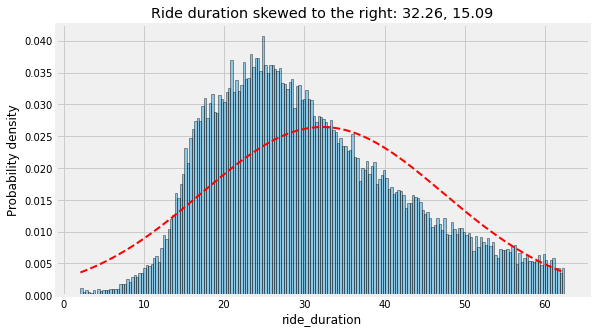

,count,mean,std,min,25%,50%,75%,max
ride_duration,51933.0,30.597708,11.95962,2.1,21.53,28.63,38.27,62.42


In [263]:
# Histogram 
fig, ax = plt.subplots(figsize=(8.5, 5))
n, bins, patches = ax.hist(data1['ride_duration'], num_bins, density=True,
                           edgecolor = 'black', lw = 1, alpha = .40)
# Normal Distribution
y = norm.pdf(bins, mu, sigma)
ax.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('ride_duration')
plt.ylabel('Probability density')

# Adding a title
plt.title(f"Ride duration skewed to the right: {round(mu,2)}, {round(sigma,2)}")
plt.grid(True)
#fig.tight_layout()
plt.show()

# Statistical summary
data1.describe()[['ride_duration']].transpose()

There is a clear indication that ride_duration is highly skewed to the right based on two key signals:

Skewness value > 1.0

Long right tail

The median trip_duration is only 29.25 min. However, there are ride_duration observations as high as 154.12 min, that were not removed previously as they are still within two standard deviations of the mean (our specified outlier cutoff). As a result, these high ride_duration observations are skewing the distribution to the right.

Thus, applying the log transformation to trip_duration will normalize its distribution and reduce the influence of these high observations in the right tail.

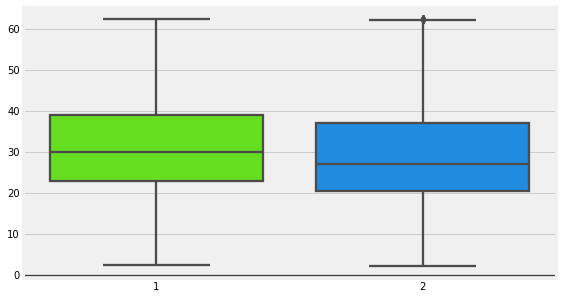

,count,mean,std,min,25%,50%,75%,max
VendorID,,,,,,,,
1,28263.0,31.483919,11.73647,2.33,22.75,29.87,39.04,62.42
2,23670.0,29.539534,12.13651,2.10,20.30,27.05,37.07,62.40


In [264]:
# Create boxplot
plt.figure(figsize=(8.5,5))
vendor_graph = sns.boxplot(x = 'VendorID', y = 'ride_duration', data = data1, 
                          palette = 'gist_rainbow', linewidth = 2.3)


# Bolding horizontal line at y = 0
vendor_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .70)

# Remove the label of the x-axis
vendor_graph.xaxis.label.set_visible(False)
vendor_graph.yaxis.label.set_visible(False)


plt.show()

# Statistical summary
data1.groupby('VendorID')['ride_duration'].describe()


The median ride_duration is pretty similar between the two vendors. However, it is worth noting that 2nd vendor also has an outliers beyond the upper fence. 

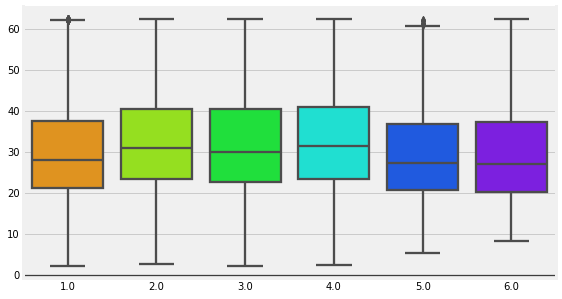

,count,mean,std,min,25%,50%,75%,max
passenger_count,,,,,,,,
1.0,37887.0,30.053691,11.839736,2.10,21.1300,28.030,37.5000,62.42
2.0,9242.0,32.464599,12.111907,2.63,23.3500,30.830,40.4700,62.40
3.0,1976.0,31.962454,12.111439,2.12,22.5950,30.030,40.4700,62.37
4.0,942.0,32.958461,12.519011,2.45,23.3850,31.445,40.8675,62.33
5.0,1214.0,29.835082,11.954141,5.23,20.5550,27.305,36.6300,62.15
6.0,672.0,29.649226,12.041965,8.25,20.0875,27.065,37.1575,62.33


In [265]:
# Create boxplot
plt.figure(figsize=(8.5,5))
passenger_graph = sns.boxplot(x = 'passenger_count', y = 'ride_duration', data = data1, 
                          palette = 'gist_rainbow', linewidth = 2.3)


# Bolding horizontal line at y = 0
passenger_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .70)

# Remove the label of the x-axis
passenger_graph.xaxis.label.set_visible(False)
passenger_graph.yaxis.label.set_visible(False)


plt.show()

# Statistical summary
data1.groupby('passenger_count')['ride_duration'].describe()

The median ride_duration does not vary much as passenger_count increases. Trips with five passengers seem to have more outliers than other trips. Passenger count does not have much effect on trip duration

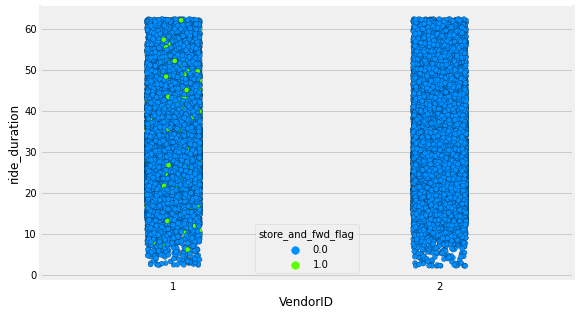

store_and_fwd_flag,0.0,1.0
VendorID,,
1,27414,849
2,23660,10


In [266]:
# Create boxplot
plt.figure(figsize=(8.5,5))
plt.setp(vendor_graph.artists, alpha = 0.5)

# Create strip plot
sns.stripplot(data = data1, x = 'VendorID', y = 'ride_duration', jitter = 1, size = 5,
             edgecolor = 'black', linewidth = .2, palette = 'gist_rainbow_r', hue = 'store_and_fwd_flag')

# Bolding horizontal line at y = 0
vendor_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .70)

# Remove the label of the x-axis
vendor_graph.xaxis.label.set_visible(False)
vendor_graph.yaxis.label.set_visible(False)


plt.show()

# Statistical summary
data1.groupby(['VendorID','store_and_fwd_flag'])['store_and_fwd_flag'].count().unstack().fillna(0)

Only Vendor 1 had trip records that were stored and forwarded to the vendor rather than directly onto the server. Thus, this store_and_fwd_flag may not be informative in predicting ride_duration times. 

In [267]:
data1['p_day'] = data1['tpep_pickup_datetime'].dt.day_name()
data1['d_day'] = data1['tpep_dropoff_datetime'].dt.day_name()
data1['pickup_hour'] = data1['tpep_pickup_datetime'].dt.hour # Extract hour


# Drop concatentated timestamp columns
data1.drop(['tpep_pickup_datetime'], axis = 1, inplace = True)
data1.drop(['tpep_dropoff_datetime'], axis = 1, inplace = True)


In [268]:
# Confirm changes
data1.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount',
       'ride_duration', 'p_day', 'd_day', 'pickup_hour'],
      dtype='object')

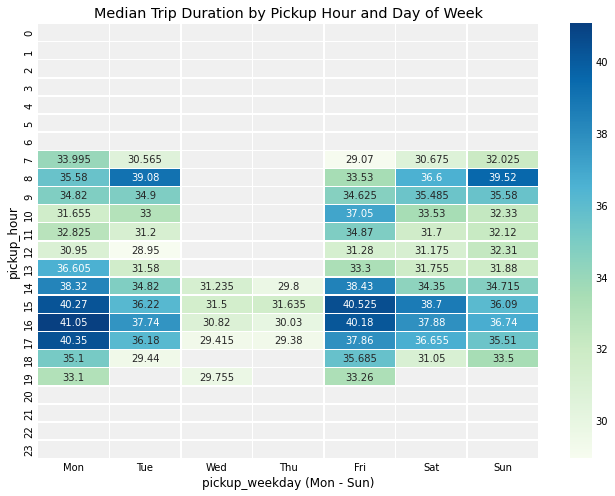

In [269]:
# Trips by Hour and Day of Week
trip_duration_median = data1['ride_duration'].median()
plt.figure(figsize=(10,8))
pickup_hourday = data1.groupby(['pickup_hour','p_day'])['ride_duration'].median().unstack()
hourday_graph = sns.heatmap(pickup_hourday[pickup_hourday>trip_duration_median],
                                    lw = .5, annot = True, cmap = 'GnBu', fmt = 'g',annot_kws = {"size":10})

# Customize tick labels of the y-axis
hourday_graph.set_xticklabels(labels = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun'])


plt.ylabel('pickup_hour')
plt.xlabel('pickup_weekday (Mon - Sun)')
plt.title('Median Trip Duration by Pickup Hour and Day of Week')
plt.show()

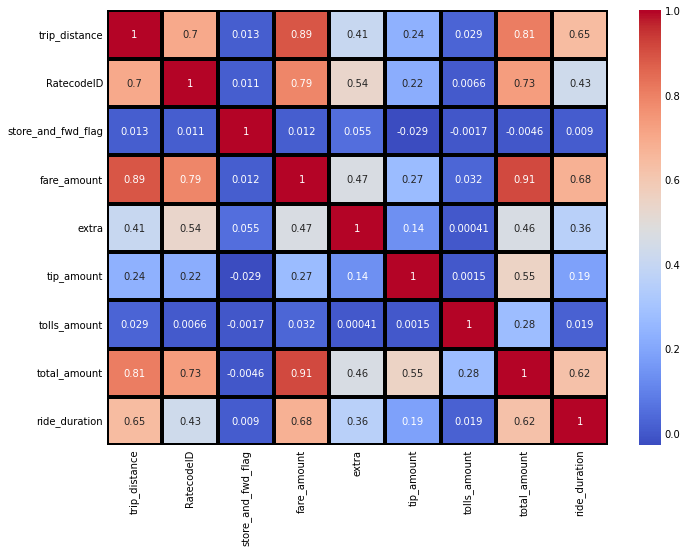

In [271]:
corr = data1.select_dtypes(include = 'float64').iloc[:, 1:].corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr, annot=True, cmap='coolwarm', linecolor = 'black', linewidths=3 )

plt.show()

Correlations

There is a weak positive correlation between the longitude variables and trip_duration. There is also a weak positive correlation betwen the tolls_amount, tip_amount variables and ride_duration.

ride_duration is well correlated with total_amount, fare_amount and trip_distance

